In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, coint

In [2]:
stocks = [
    "KCHOL.IS",
    "AYGAZ.IS",
    "FROTO.IS",
    "MAALT.IS",
    "OTKAR.IS",
    "TATGD.IS",
    "TOASO.IS",
    "ARCLK.IS",
    "TTRAK.IS",
    "TUPRS.IS",
    "YKBNK.IS",
    "KGYO.IS",
]

In [3]:
df = yf.download(stocks, start="2013-01-01")
df = df["Adj Close"]
df.fillna(method="pad", inplace=True)

[*********************100%***********************]  12 of 12 completed


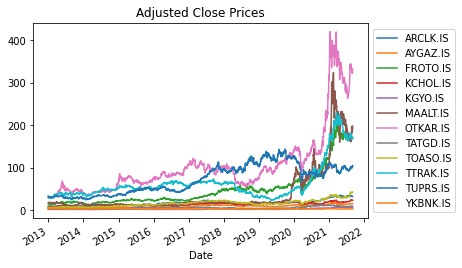

In [4]:
f = plt.figure()
plt.title("Adjusted Close Prices", color="black")
df.plot(ax=f.gca())
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.show()

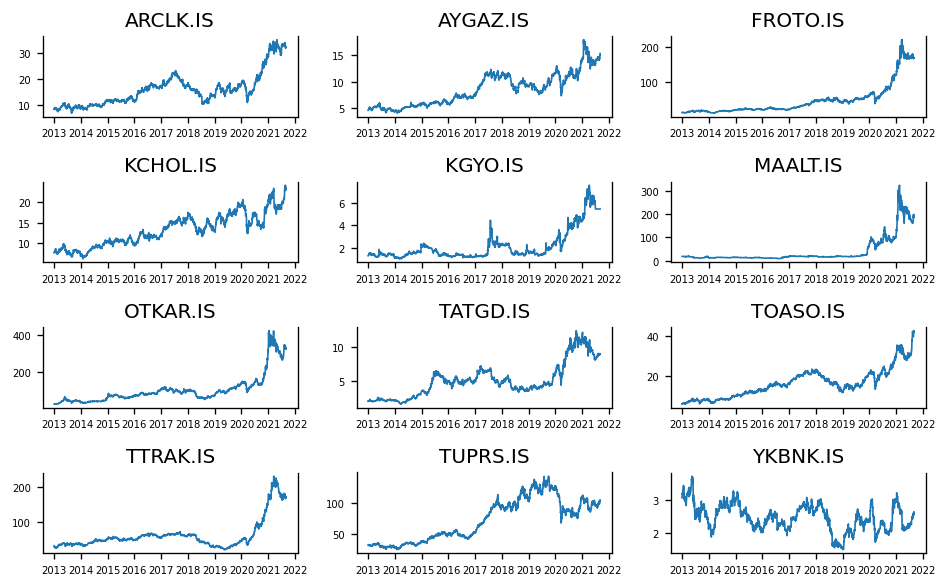

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=3, dpi=120, figsize=(8, 5))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, linewidth=1)
    ax.set_title(df.columns[i])
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout()

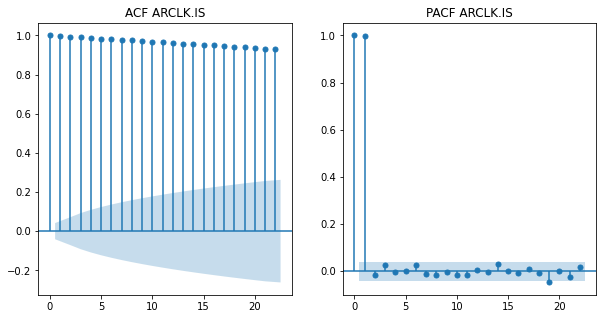

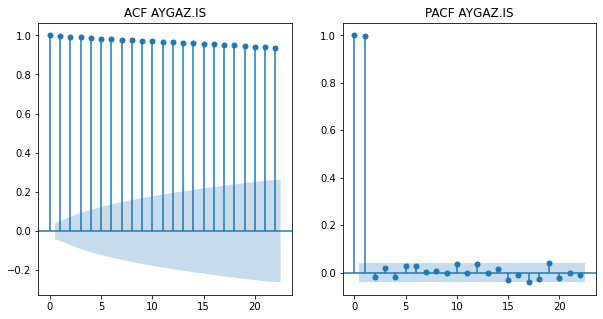

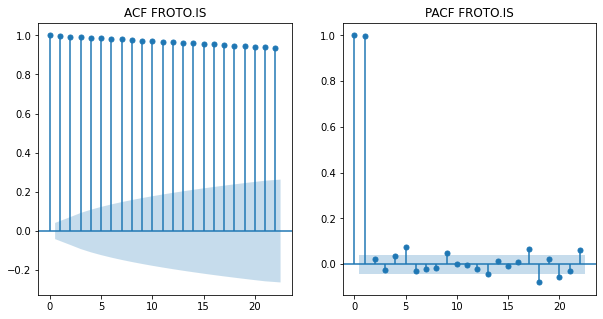

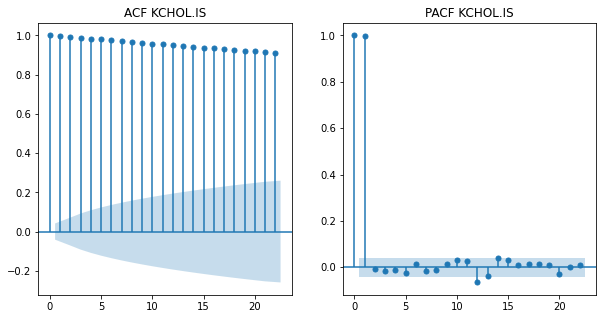

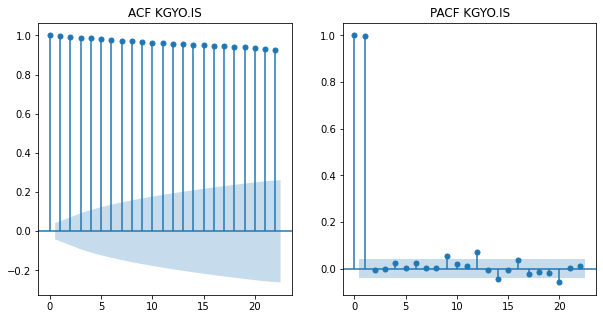

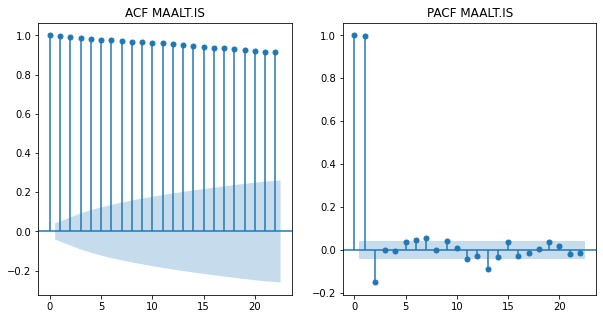

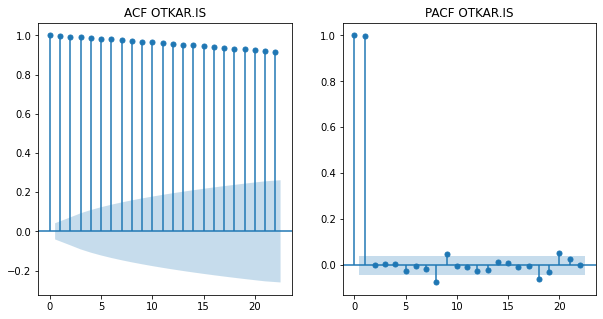

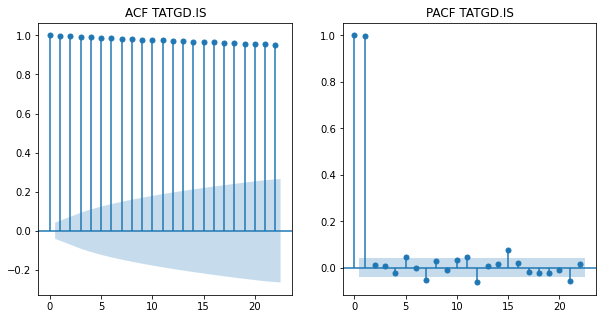

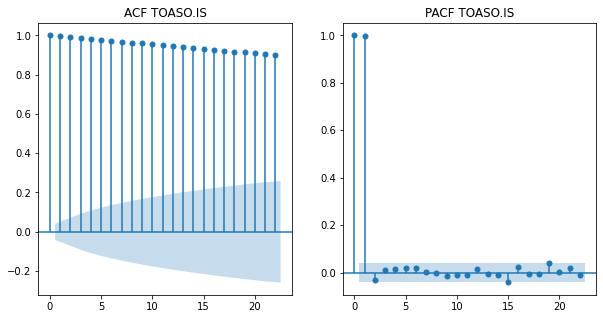

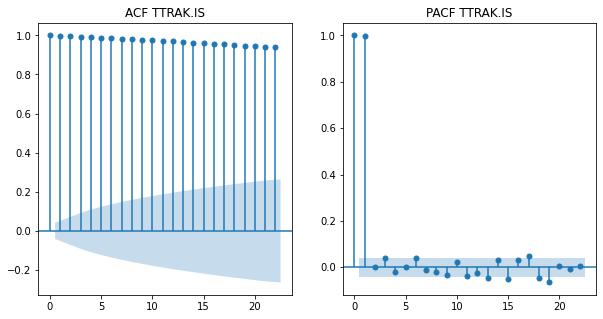

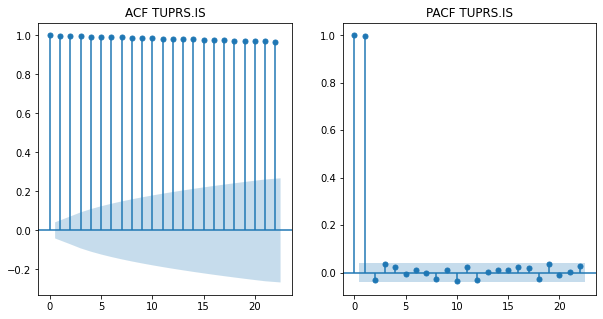

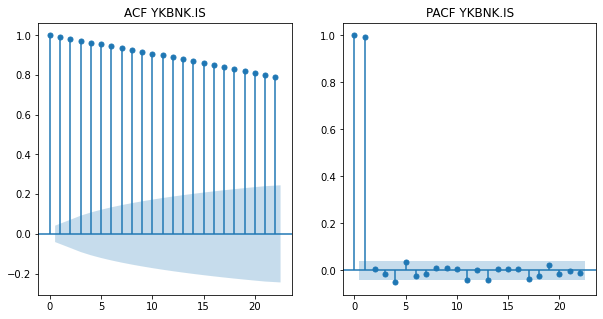

In [6]:
for i in df.columns:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    plot_acf(df[i].values.squeeze(), lags=22, ax=ax[0], title=f"ACF {i}")
    plot_pacf(df[i].values.squeeze(), lags=22, ax=ax[1], title=f"PACF {i}")
    plt.show()

In [7]:
for i in df:
    res = adfuller(df[i])
    print(f"ADF Statistic for {i}: {res[0]}")
    print(f"p-value: {res[1]}")

ADF Statistic for ARCLK.IS: -0.1423711079207305
p-value: 0.9450512311275658
ADF Statistic for AYGAZ.IS: -0.6520563913338443
p-value: 0.8587803860629211
ADF Statistic for FROTO.IS: 1.706322442015518
p-value: 0.998143942945219
ADF Statistic for KCHOL.IS: -0.8025036403074237
p-value: 0.818385535745728
ADF Statistic for KGYO.IS: -0.39134779537993186
p-value: 0.9115333936116983
ADF Statistic for MAALT.IS: -0.5398683612696974
p-value: 0.8839988670433563
ADF Statistic for OTKAR.IS: -0.2507886919668374
p-value: 0.9321907239540617
ADF Statistic for TATGD.IS: -1.0497885191503467
p-value: 0.7346749973875433
ADF Statistic for TOASO.IS: 1.0945085632827443
p-value: 0.9951694818319144
ADF Statistic for TTRAK.IS: -0.08139864107302033
p-value: 0.9512600704666062
ADF Statistic for TUPRS.IS: -1.183556256832427
p-value: 0.6806290958073922
ADF Statistic for YKBNK.IS: -3.260604366964954
p-value: 0.01673396156863957


In [8]:
for s1 in df.columns:
    for s2 in df.columns:
        if s1 != s2:
            res = coint(df[s1], df[s2], trend="nc")
            pval = res[1]
            if pval <= 0.05:
                print(f"{s1} and {s2} has cointegration, p-value: {pval}")

AYGAZ.IS and KCHOL.IS has cointegration, p-value: 0.006723021395156843
FROTO.IS and MAALT.IS has cointegration, p-value: 0.015681045123196836
FROTO.IS and OTKAR.IS has cointegration, p-value: 0.007275878974978631
KCHOL.IS and AYGAZ.IS has cointegration, p-value: 0.00662334026108861
KGYO.IS and OTKAR.IS has cointegration, p-value: 0.0016322782128439367
KGYO.IS and TOASO.IS has cointegration, p-value: 0.045721351962125976
KGYO.IS and TTRAK.IS has cointegration, p-value: 0.026068731124745663
MAALT.IS and FROTO.IS has cointegration, p-value: 0.007915220960871673
OTKAR.IS and FROTO.IS has cointegration, p-value: 0.00450328452121626
OTKAR.IS and KGYO.IS has cointegration, p-value: 0.002377302505867608
OTKAR.IS and TTRAK.IS has cointegration, p-value: 0.03927475028370782
TTRAK.IS and KGYO.IS has cointegration, p-value: 0.034989685322529177
TTRAK.IS and OTKAR.IS has cointegration, p-value: 0.03566390518900727
